In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_excel('youtube_statistics.xlsx')

In [75]:
df.shape

(36791, 18)

Dataset memiliki 36791 baris dan 18 kolom

In [76]:
df.sample(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
11786,2018-01-18,வள்ளி | VALLI | Sun TV | Tamil Serial | Episod...,Saregama TVShows,24,17:30:00,"Valli|""Vidhya""|""Ramji""|""indraja""|""Paulraj""|""Ra...",149051,941,133,68,False,False,False,VALLI - WATCH TODAY EPISODE ::\n\nஉமாமகேஸ்வரிக...,36,728,72,2018-01-16
9376,2018-01-03,Chinte Parli Na ( চিনতে পারলি না ) | Total Dad...,SVF,1,13:29:58,"Chinte Parli Na|""চিনতে পারলি না""|""Total Dadagi...",407477,11078,1434,1131,False,False,False,"Love searches for love, love finds love. Unspo...",23,1773,99,2018-01-01


# Descriptive Statistic

## Cek Tipe data

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [78]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

`trending_date` memiliki tipe data yang tidak sesuai harusnya datetime dan kolom `description` memiliki nilai null

In [79]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


nilai mean dan median pada kolom `views`, `dislikes`, dan `desc_len` memiliki selisih yang besar

In [80]:
df.duplicated().sum()

4229

# EDA

In [81]:
df_raw = df.copy()

## Kategorikal, Numerikal dan Waktu

In [82]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [83]:
df_raw[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,2,2,2,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,35611,36034,36780,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


In [84]:
df_raw[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


# Univariate Analysis

### Numerikal

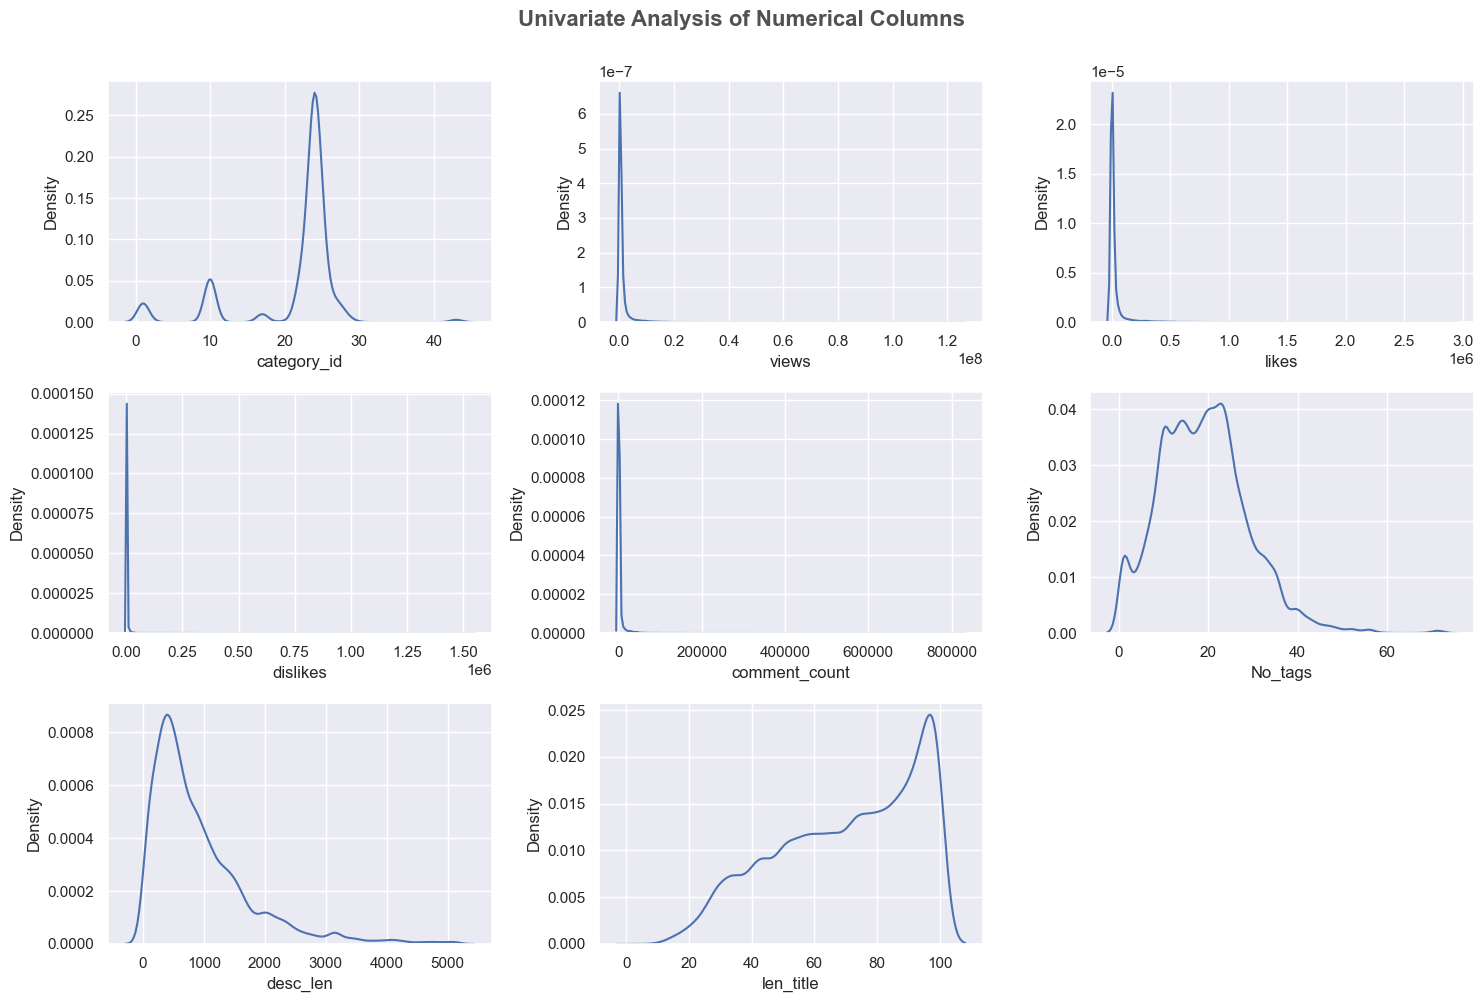

In [85]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(nums):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df_raw[col])
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

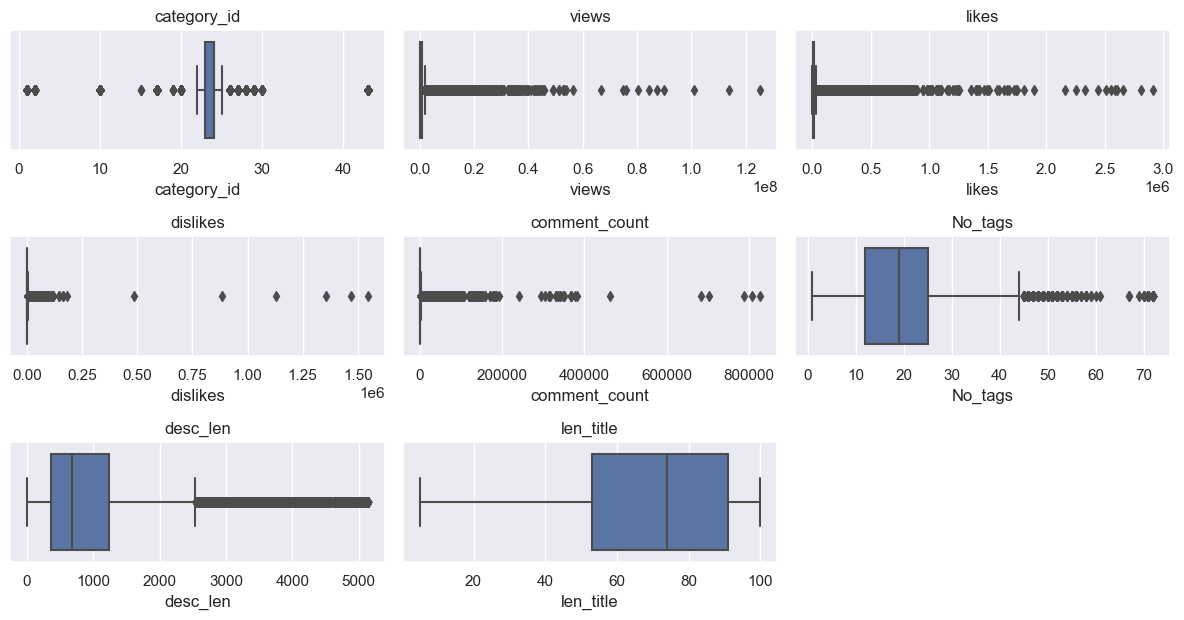

In [86]:
plt.figure(figsize=(12, 10))
for i in range(len(nums)):
    plt.subplot(5, 3, i + 1)
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df, x=nums[i])
    plt.title(nums[i])
    plt.xlabel(nums[i])
    plt.tight_layout()

plt.show()

### Kategorikal

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [88]:
# Kolom dengan tipe data object dan boolean
display(df.select_dtypes(include=['object', 'bool']).columns)

# Ukuran DataFrame setelah pemilihan kolom
print(df.select_dtypes(include=['object', 'bool']).shape)

# Memilih kolom dengan tipe data object dan boolean
df_cats_bool = df.select_dtypes(include=['object', 'bool'])
df_cats_bool.head()

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')

(36791, 9)


,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",False,False,False,This video showcases the difference between pe...
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [89]:
#look for unique values from each categorical data
df_cats_unique = df_cats_bool.nunique().reset_index()
df_cats_unique.columns = ['feature', 'unique_value']
df_cats_unique = df_cats_unique.sort_values('unique_value', ascending=False)
df_cats_unique

,feature,unique_value
1,title,16431
8,description,13979
4,tags,12463
3,publish_time,12375
2,channel_title,1390
0,trending_date,205
5,comments_disabled,2
6,ratings_disabled,2
7,video_error_or_removed,2


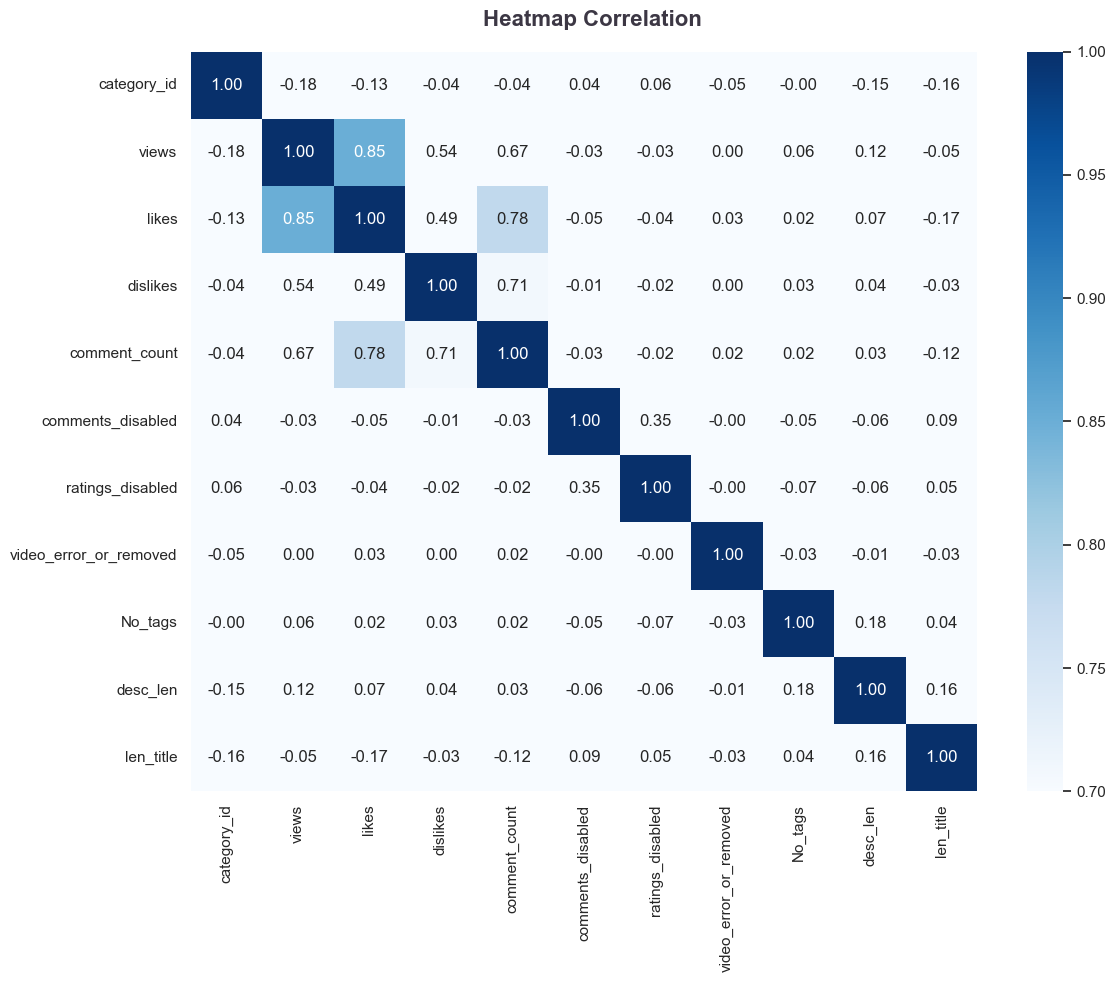

In [90]:
plt.figure(figsize=(12,10))
sns.heatmap(df_raw.corr(), annot=True, fmt='.2f', cmap='Blues', vmin=0.7)
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

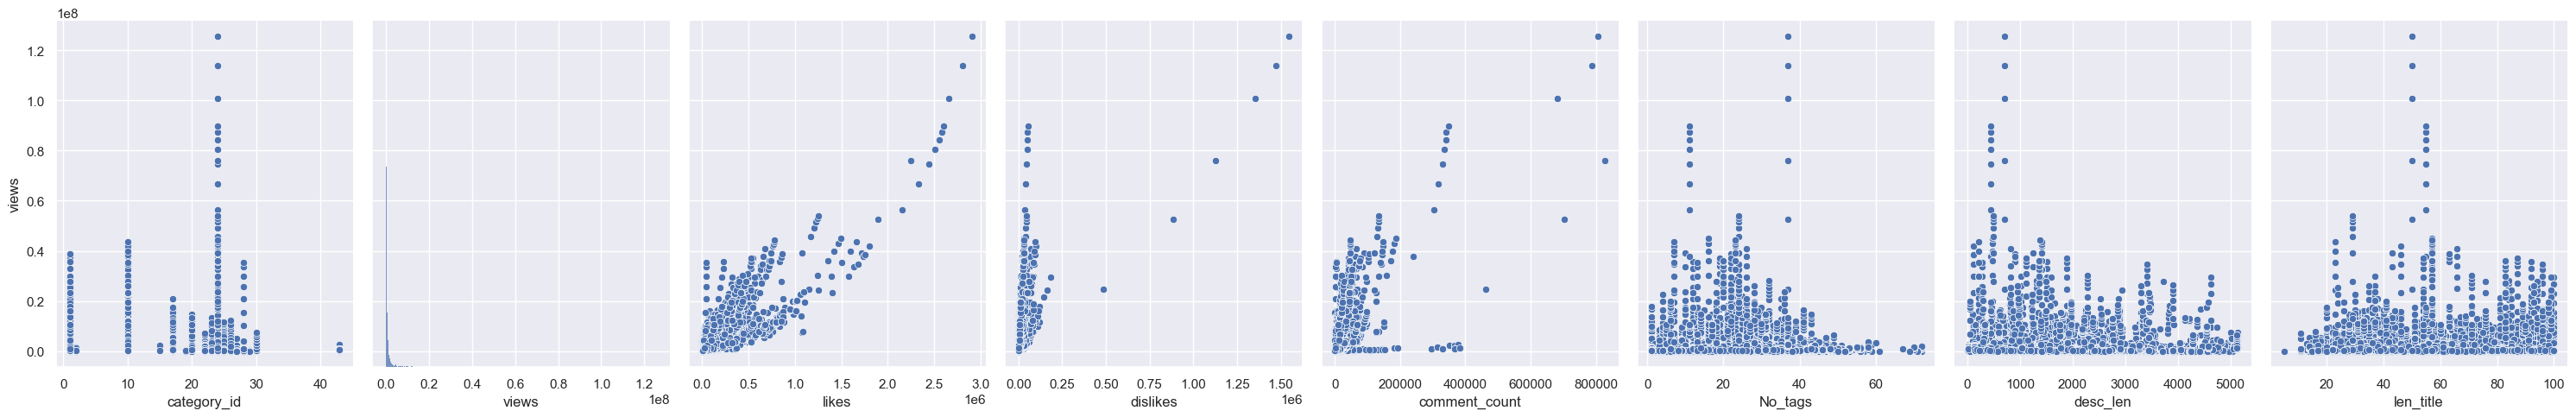

In [91]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=df, x_vars=nums, y_vars=['views'], height=5, aspect=0.75)
plt.tight_layout()
plt.show()

### Trending Date

In [92]:
df_raw = df.copy()

In [93]:
df_raw['trending_date'] = pd.to_datetime(df_raw['trending_date'])

# Memisahkan tanggal menjadi bagian-bagian terpisah (tahun, bulan, hari)
# df_raw['Trending_Month'] = df_raw['trending_date'].dt.month
# df_raw['Trending_Day_of_month'] = df_raw['trending_date'].dt.day
# df_raw['Trending_Day_name'] = df_raw['trending_date'].dt.day_name()
# df_raw['Trending_Weekend_flag'] = (df_raw['trending_date'].dt.dayofweek >= 5).astype(int)

#### Daily Trend

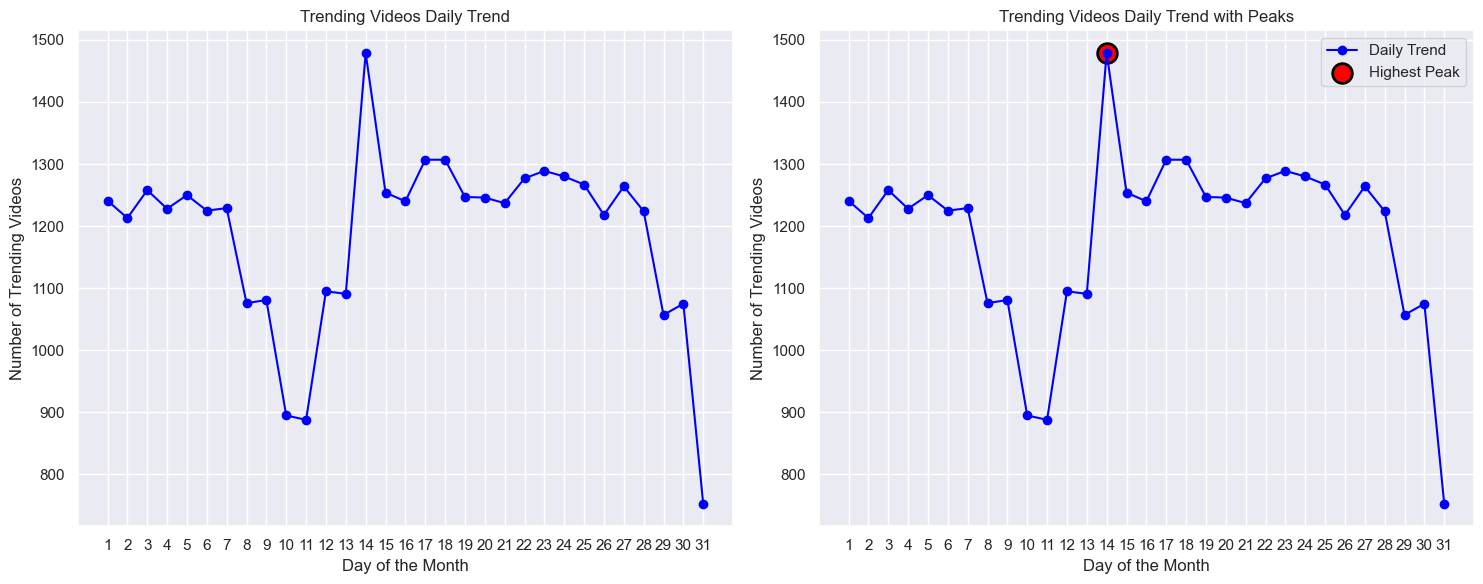

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren harian
df_raw['Trending_Day_of_month'] = df_raw['trending_date'].dt.day
daily_trend = df_raw.groupby(df_raw['Trending_Day_of_month'])['Trending_Day_of_month'].count()
axs[0].plot(daily_trend.index, daily_trend.values, label='Daily Trend', color='blue', marker='o')
axs[0].set_title('Trending Videos Daily Trend')
axs[0].set_xlabel('Day of the Month')
axs[0].set_ylabel('Number of Trending Videos')

# Puncak pada tren harian
peaks = daily_trend[daily_trend == daily_trend.max()]
axs[1].plot(daily_trend.index, daily_trend.values, label='Daily Trend', color='blue', marker='o')
axs[1].scatter(peaks.index, peaks.values, color='red', s=200, label='Highest Peak', marker='o', edgecolors='black', linewidth=2)
axs[1].set_title('Trending Videos Daily Trend with Peaks')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Number of Trending Videos')

plt.setp(axs, xticks=list(range(1, 32)))
plt.tight_layout()
plt.legend()
plt.show()

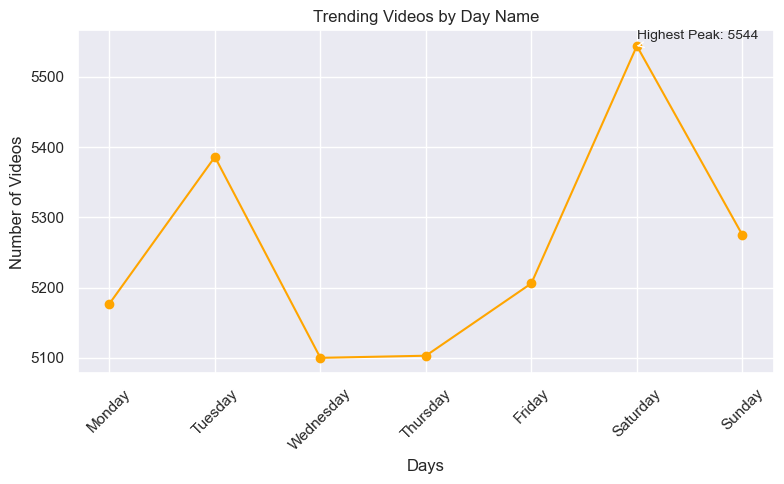

In [95]:
df_raw['Trending_Day_name'] = df_raw['trending_date'].dt.day_name()
trending_day_name = df_raw['Trending_Day_name'].value_counts()

plt.figure(figsize=(8, 5))
trending_day_name = trending_day_name.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.plot(trending_day_name.index, trending_day_name.values, marker='o', color='orange')

# Menemukan highest peak
highest_peak = max(trending_day_name)
day_highest_peak = trending_day_name[trending_day_name == highest_peak].index[0]

# Annotate highest peak
plt.annotate(f'Highest Peak: {highest_peak}', xy=(day_highest_peak, highest_peak), xytext=(day_highest_peak, highest_peak + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.title('Trending Videos by Day Name')
plt.xlabel('Days')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Weekly Trend

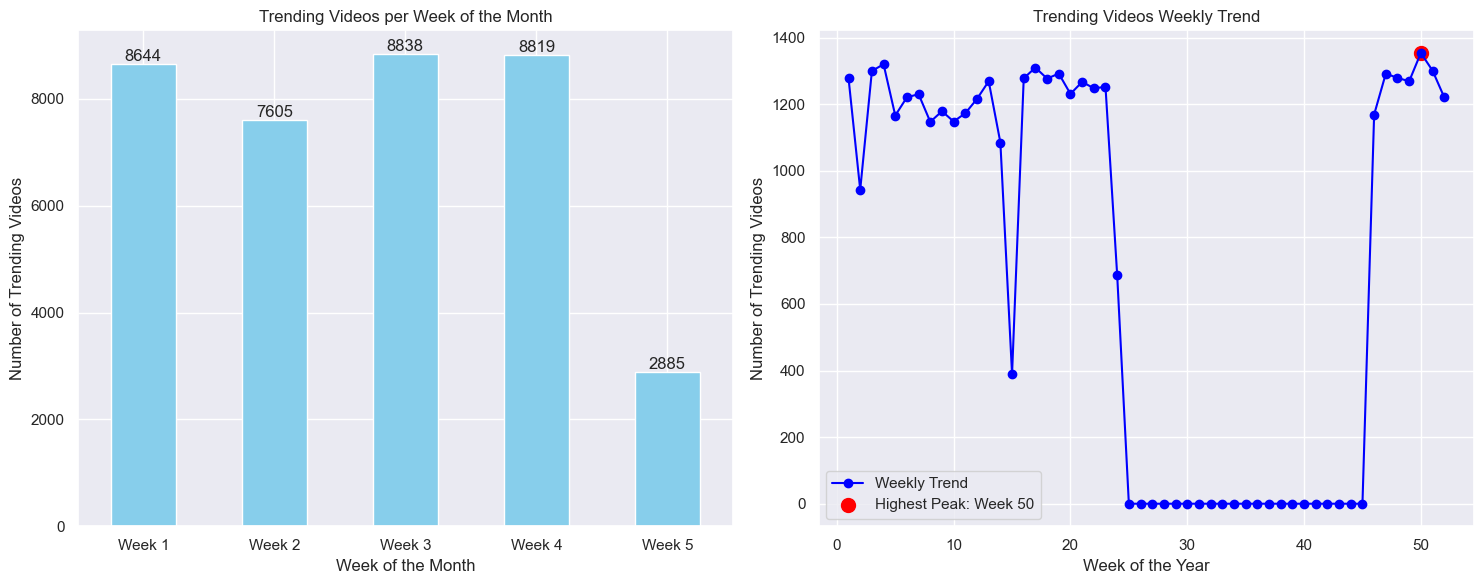

In [96]:
df_raw['week_of_month'] = df_raw['trending_date'].dt.day.apply(lambda x: (x - 1) // 7 + 1)

# Visualisasi tren per minggu dalam sebulan
weekly_trend_month = df_raw.groupby('week_of_month')['trending_date'].count()

# Visualisasi tren mingguan dalam setahun
weekly_trend_year = df_raw.groupby(df_raw['trending_date'].dt.isocalendar().week)['trending_date'].count()

# Plotting both trends together using subplots and iteration
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren per minggu dalam sebulan
bars = weekly_trend_month.plot(kind='bar', color='skyblue', ax=axs[0])
for bar in bars.patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
             ha='center', va='bottom')
axs[0].set_title('Trending Videos per Week of the Month')
axs[0].set_xlabel('Week of the Month')
axs[0].set_ylabel('Number of Trending Videos')
axs[0].set_xticklabels([f'Week {i}' for i in weekly_trend_month.index], rotation=0)

# Tren mingguan dalam setahun dengan hanya puncak tertinggi
all_weeks = pd.Series(np.arange(1, 53))
weekly_trend_year = weekly_trend_year.reindex(all_weeks, fill_value=0)
peaks = weekly_trend_year[(weekly_trend_year.shift(1) < weekly_trend_year) & (weekly_trend_year.shift(-1) < weekly_trend_year)]
highest_peak = peaks[peaks == peaks.max()]

axs[1].plot(weekly_trend_year.index, weekly_trend_year.values, marker='o', linestyle='-', color='blue', label='Weekly Trend')
axs[1].scatter(highest_peak.index, highest_peak.values, color='red', s=100, label=f'Highest Peak: Week {highest_peak.index[0]}')
axs[1].set_title('Trending Videos Weekly Trend')
axs[1].set_xlabel('Week of the Year')
axs[1].set_ylabel('Number of Trending Videos')
axs[1].legend()

plt.tight_layout()
plt.show()

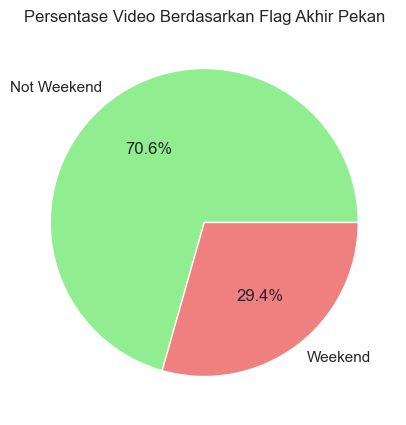

In [97]:
df_raw['Trending_Weekend_flag'] = (df_raw['trending_date'].dt.dayofweek >= 5).astype(int)
weekend_counts = df_raw['Trending_Weekend_flag'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(weekend_counts, labels=['Not Weekend', 'Weekend'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Persentase Video Berdasarkan Flag Akhir Pekan')
plt.show()

#### Monthly Trend

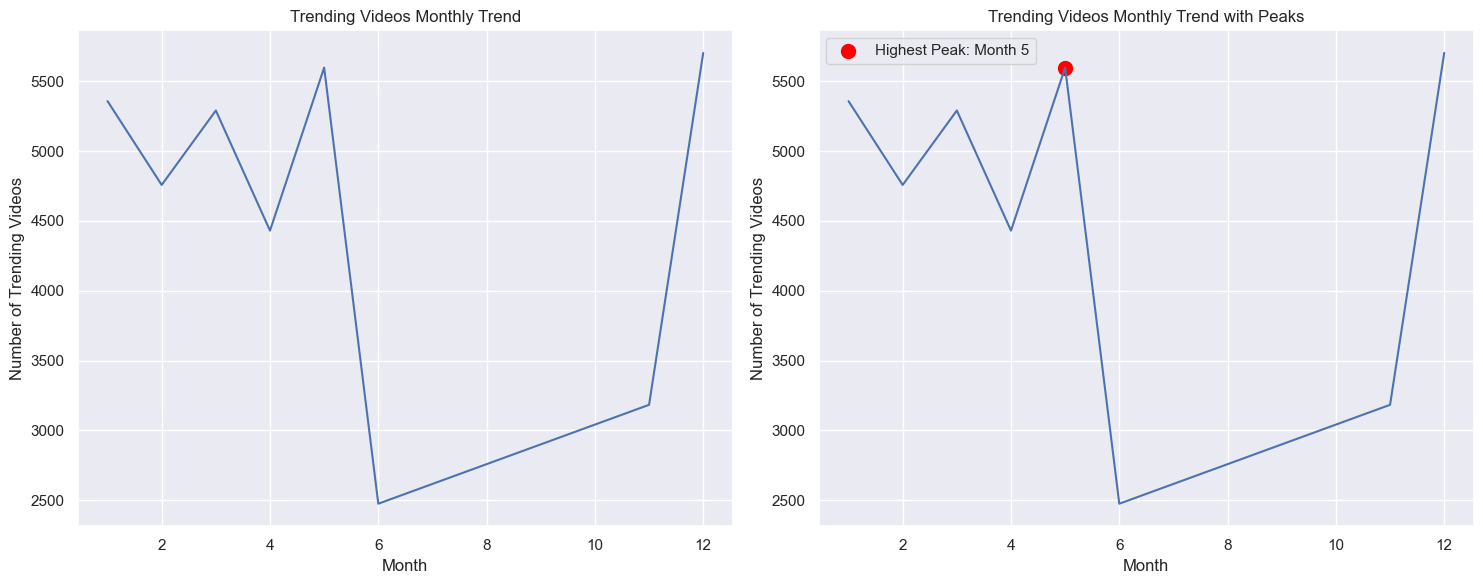

In [98]:
df_raw['Trending_Month'] = df_raw['trending_date'].dt.month
monthly_trend_count = df_raw['Trending_Month'].value_counts().sort_index()
# Plotting both trends together using subplots and iteration

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren bulanan tanpa puncak
monthly_trend_count.plot(kind='line', ax=axs[0])
axs[0].set_title('Trending Videos Monthly Trend')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Trending Videos')

# Tren bulanan dengan puncak
peaks = monthly_trend_count[(monthly_trend_count.shift(1) < monthly_trend_count) & (monthly_trend_count.shift(-1) < monthly_trend_count)]
max_month = peaks.idxmax()
axs[1].plot(monthly_trend_count.index, monthly_trend_count.values)
axs[1].scatter(max_month, monthly_trend_count[max_month], color='red', s=100, label=f'Highest Peak: Month {max_month}')
axs[1].set_title('Trending Videos Monthly Trend with Peaks')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Trending Videos')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Yearly Trend

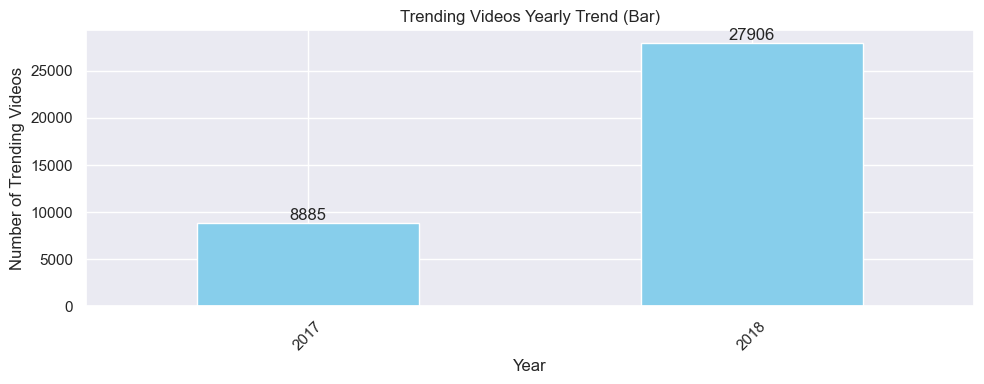

In [99]:
yearly_trend = df_raw.groupby(df_raw['trending_date'].dt.year)['trending_date'].count()

# Visualisasi tren tahunan (grafik batang)
yearly_trend.plot(kind='bar', color='skyblue')
plt.title('Trending Videos Yearly Trend (Bar)')
plt.xlabel('Year')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45)
for index, value in enumerate(yearly_trend):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [100]:
most_common_dates = df_raw['trending_date'].value_counts().nlargest(10)
print("Tanggal dengan frekuensi tertinggi video trending:\n", most_common_dates)

Tanggal dengan frekuensi tertinggi video trending:
 2017-12-23    199
2017-12-22    198
2018-04-15    198
2018-05-05    198
2017-12-16    197
2017-12-13    197
2018-01-25    197
2018-01-20    196
2017-12-12    196
2018-03-03    196
Name: trending_date, dtype: int64


### Publish Time

In [101]:
df_raw['publish_time'] = pd.to_datetime(df_raw['publish_time'])
df_raw['publish_time_hour'] = df_raw['publish_time'].dt.hour
df_raw['publish_time_minute'] = df_raw['publish_time'].dt.minute
df_raw['publish_time_second'] = df_raw['publish_time'].dt.second

#### Publish time hour per day

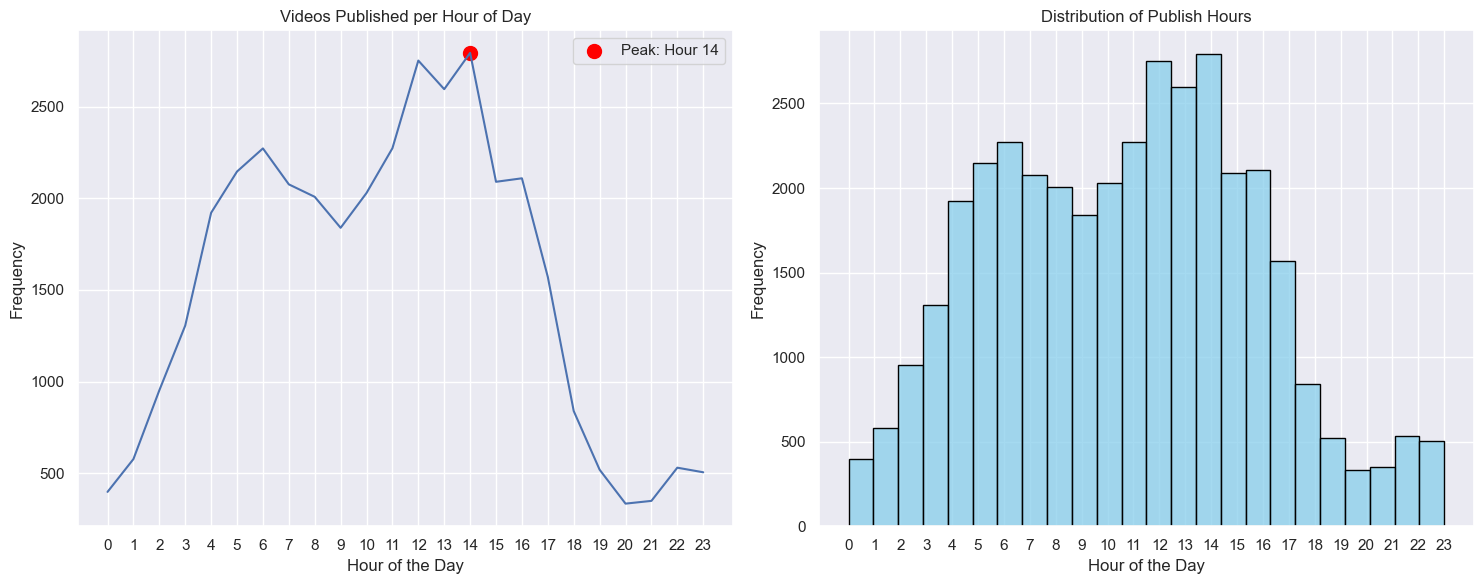

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Videos Published per Hour of Day (Line plot)
hour_counts = df_raw['publish_time_hour'].value_counts().sort_index()
axs[0].plot(hour_counts.index, hour_counts.values)

# Find the hour with maximum videos published
max_hour = hour_counts.idxmax()
max_count = hour_counts[max_hour]

# Plotting peak point
axs[0].scatter(max_hour, max_count, color='red', s=100, label=f'Peak: Hour {max_hour}')
axs[0].set_title('Videos Published per Hour of Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks(range(0, 24))
axs[0].legend()

# Plot 2: Distribution of Publish Hours (Histogram)
sns.histplot(df_raw['publish_time_hour'], bins=24, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Distribution of Publish Hours')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

#### Publish time Minute per Hour

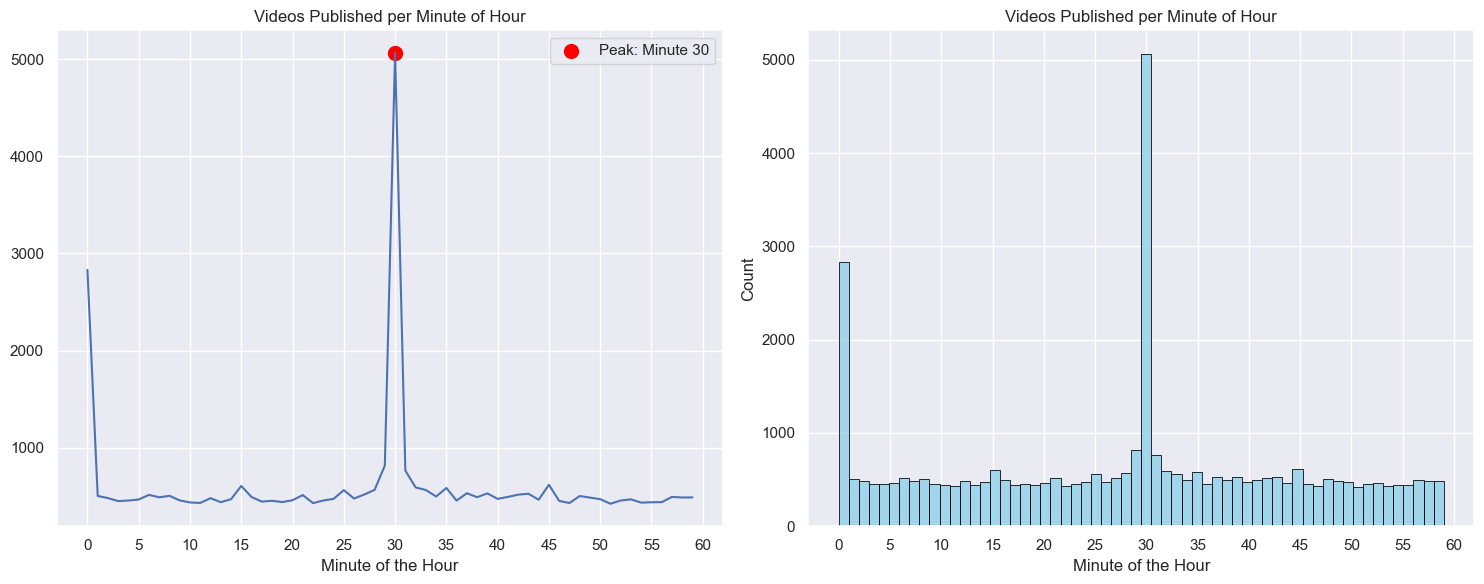

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Videos Published per Minute of Hour (Line plot)
minute_counts = df_raw['publish_time_minute'].value_counts().sort_index()
axs[0].plot(minute_counts.index, minute_counts.values)

# Find the minute with the maximum videos published
max_minute = minute_counts.idxmax()
max_minute_count = minute_counts[max_minute]

# Plotting the peak point
axs[0].scatter(max_minute, max_minute_count, color='red', s=100, label=f'Peak: Minute {max_minute}')
axs[0].set_title('Videos Published per Minute of Hour')
axs[0].set_xlabel('Minute of the Hour')
axs[0].set_xticks(range(0, 61, 5)) 
axs[0].legend()

# Plot 2: Distribution of Publish Hours (Histogram)
sns.histplot(df_raw['publish_time_minute'], bins=60, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Videos Published per Minute of Hour')
axs[1].set_xlabel('Minute of the Hour')
axs[1].set_xticks(range(0, 61, 5))

plt.tight_layout()
plt.show()

#### Publish time Second per minute

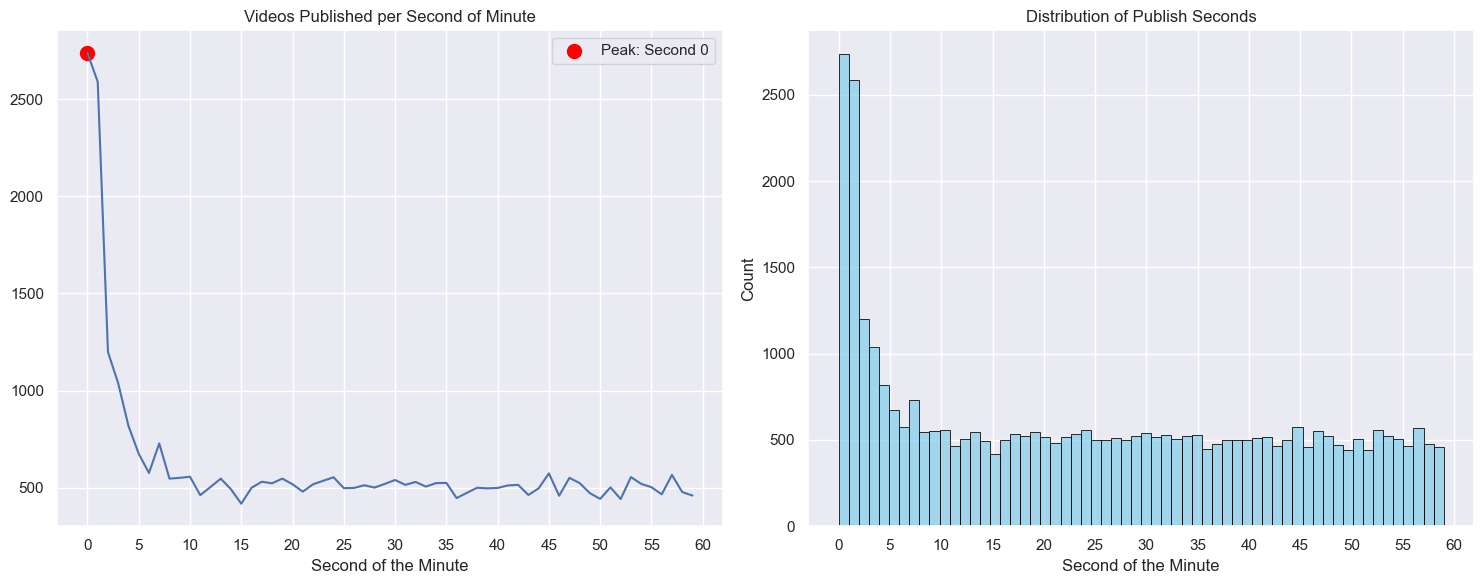

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Videos Published per Second of Minute (Line plot)
sec_counts = df_raw['publish_time_second'].value_counts().sort_index()
axs[0].plot(sec_counts.index, sec_counts.values)

# Find the second with the maximum videos published
max_sec = sec_counts.idxmax()
max_sec_count = sec_counts[max_sec]

# Plotting the peak point
axs[0].scatter(max_sec, max_sec_count, color='red', s=100, label=f'Peak: Second {max_sec}')
axs[0].set_title('Videos Published per Second of Minute')
axs[0].set_xlabel('Second of the Minute')
axs[0].set_xticks(range(0, 61, 5))
axs[0].legend()

# Plot 2: Distribution of Publish Hours (Histogram) for comparison
sns.histplot(df_raw['publish_time_second'], bins=60, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Distribution of Publish Seconds')
axs[1].set_xlabel('Second of the Minute')
axs[1].set_xticks(range(0, 61, 5))

plt.tight_layout()
plt.show()

### Publish date

In [105]:
df_raw['publish_date'] = pd.to_datetime(df_raw['publish_date'])

#### Publish date Daily

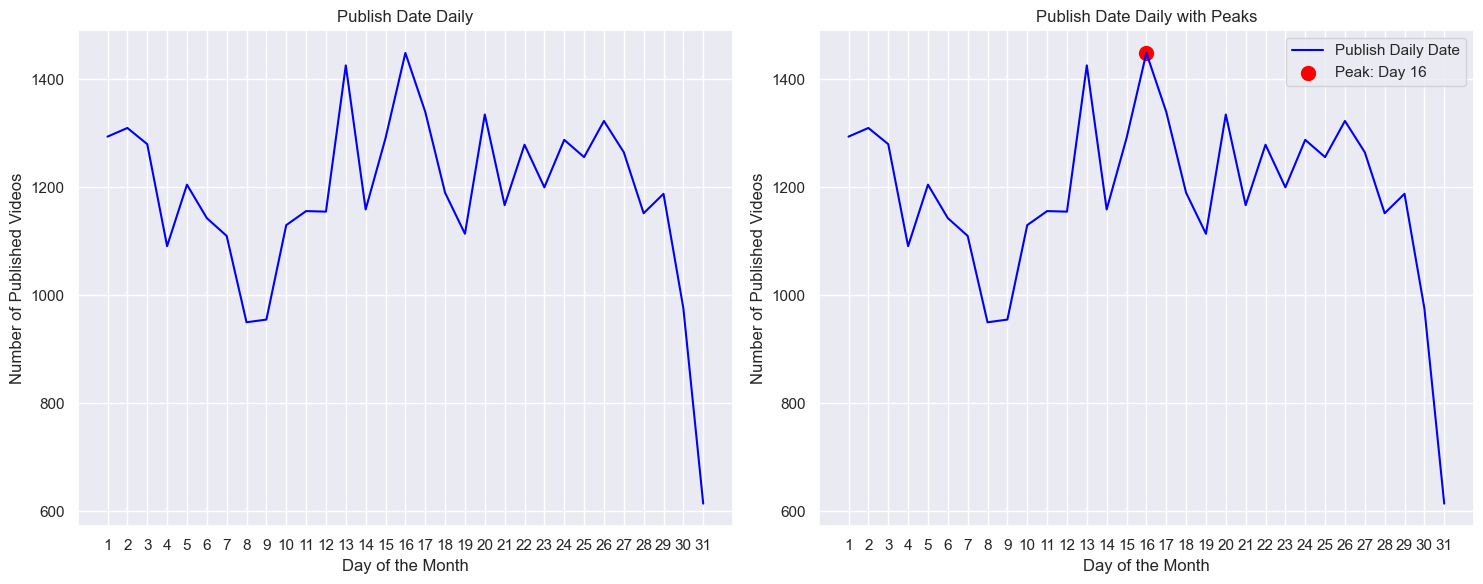

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren harian
daily_date = df_raw.groupby(df_raw['publish_date'].dt.day)['publish_date'].count()
axs[0].plot(daily_date.index, daily_date.values, label='Daily', color='blue')
axs[0].set_title('Publish Date Daily')
axs[0].set_xlabel('Day of the Month')
axs[0].set_ylabel('Number of Published Videos')
axs[0].set_xticks(range(1, 32))  # Mengatur rentang sumbu x dari 1 hingga 31

# Puncak pada tren harian
peaks = daily_date[daily_date == daily_date.max()]
axs[1].plot(daily_date.index, daily_date.values, label='Publish Daily Date', color='blue')
axs[1].scatter(peaks.index, peaks.values, color='red', s=100, label=f'Peak: Day {peaks.index[0]}')
axs[1].set_title('Publish Date Daily with Peaks')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Number of Published Videos')
axs[1].set_xticks(range(1, 32))  # Mengatur rentang sumbu x dari 1 hingga 31

plt.tight_layout()
plt.legend()
plt.show()

#### Publish date Weekly

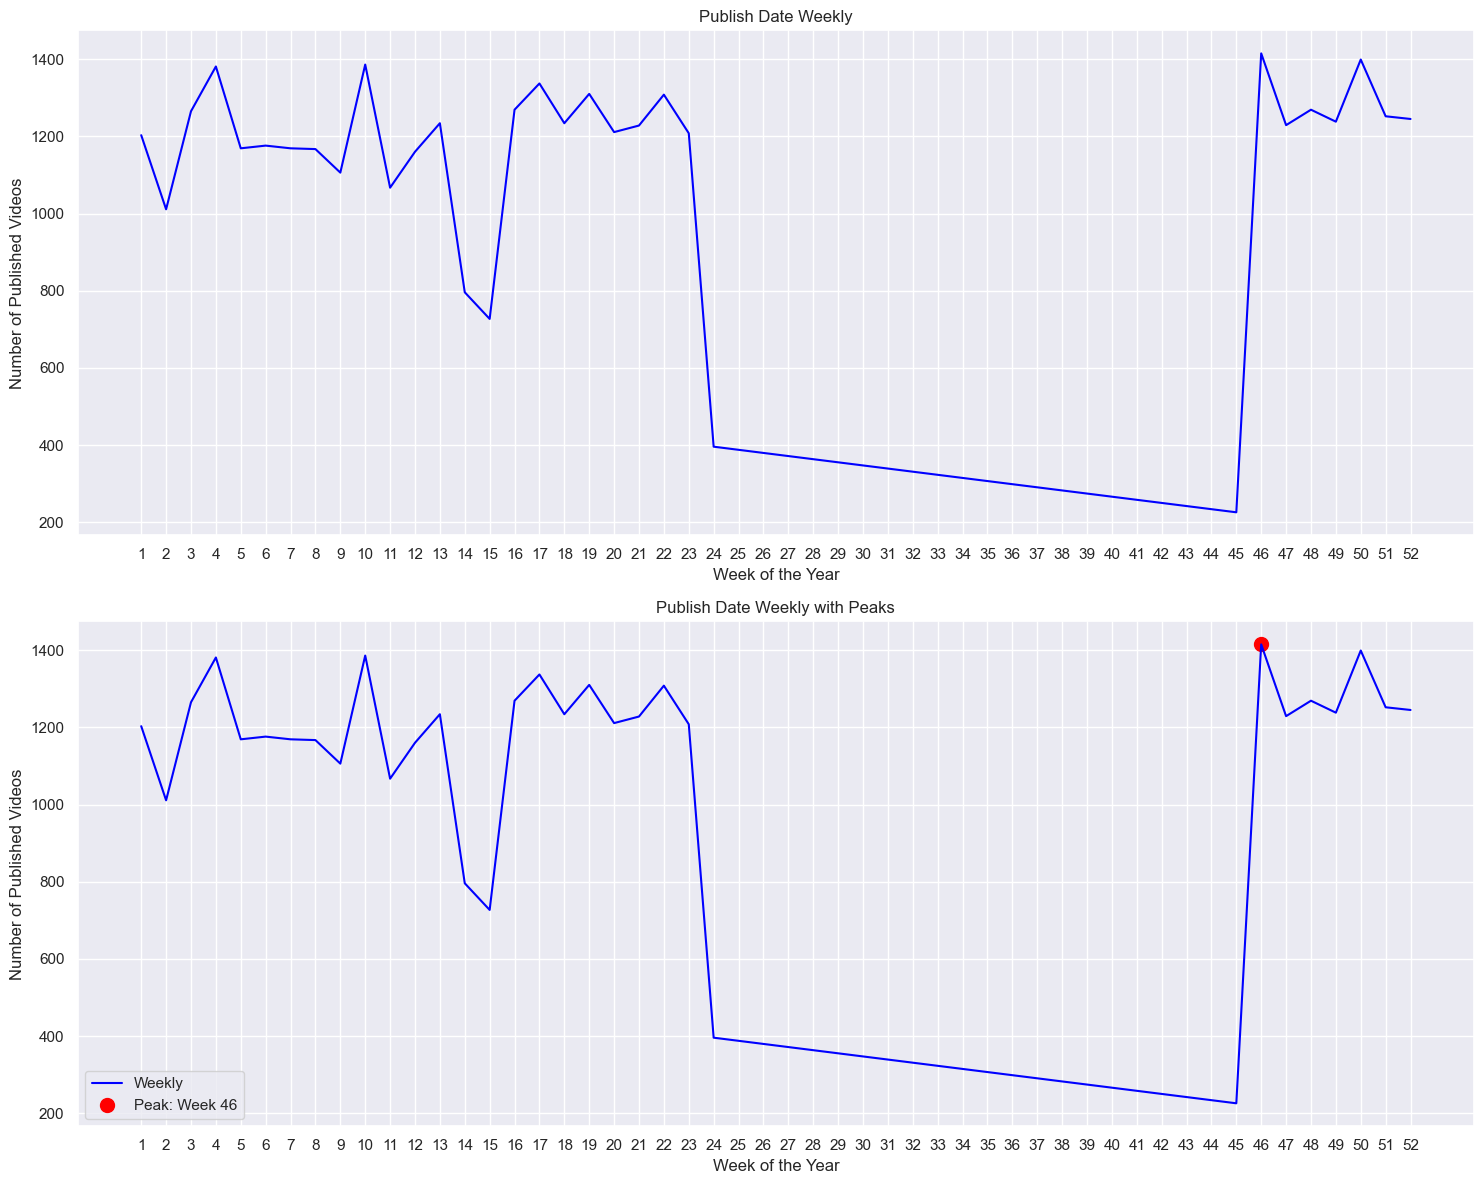

In [107]:
# Kelompokkan data berdasarkan minggu dan hitung jumlah video yang diterbitkan
weekly_date = df_raw.groupby(df_raw['publish_date'].dt.week)['publish_date'].count()
weekly_peaks = weekly_date[weekly_date == weekly_date.max()]

# Buat subplot dengan 2 baris dan 1 kolom
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Plot tren mingguan di baris pertama
axs[0].plot(weekly_date.index, weekly_date.values, label='Weekly', color='blue')
axs[0].set_title('Publish Date Weekly')
axs[0].set_xlabel('Week of the Year')
axs[0].set_ylabel('Number of Published Videos')
axs[0].set_xticks(range(1, 53))  # Atur tanda sumbu x untuk menampilkan semua minggu dari 1 hingga 52

# Plot tren mingguan dengan puncak di baris kedua
axs[1].plot(weekly_date.index, weekly_date.values, label='Weekly', color='blue')
axs[1].scatter(weekly_peaks.index, weekly_peaks.values, color='red', s=100, label=f'Peak: Week {weekly_peaks.index[0]}')
axs[1].set_title('Publish Date Weekly with Peaks')
axs[1].set_xlabel('Week of the Year')
axs[1].set_ylabel('Number of Published Videos')
axs[1].set_xticks(range(1, 53))  # Atur tanda sumbu x untuk menampilkan semua minggu dari 1 hingga 52

plt.tight_layout()
plt.legend()
plt.show()


#### Publish date Monthly

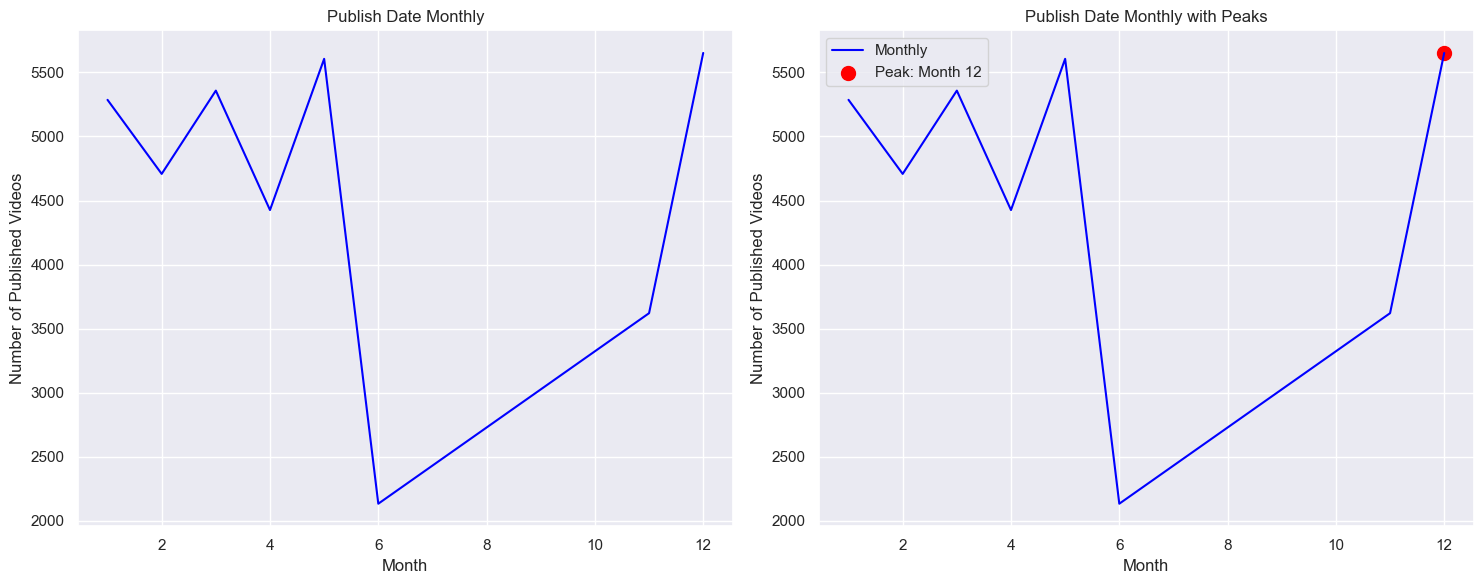

In [108]:
# Month
monthly_date = df_raw.groupby(df_raw['publish_date'].dt.month)['publish_date'].count()
monthly_peaks = monthly_date[monthly_date == monthly_date.max()]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Monthly Trend
axs[0].plot(monthly_date.index, monthly_date.values, label='Monthly', color='blue')
axs[0].set_title('Publish Date Monthly')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Published Videos')

# Monthly Trend with Peaks
axs[1].plot(monthly_date.index, monthly_date.values, label='Monthly', color='blue')
axs[1].scatter(monthly_peaks.index, monthly_peaks.values, color='red', s=100, label=f'Peak: Month {monthly_peaks.index[0]}')
axs[1].set_title('Publish Date Monthly with Peaks')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Published Videos')

plt.tight_layout()
plt.legend()
plt.show()

#### Publish date Yearly

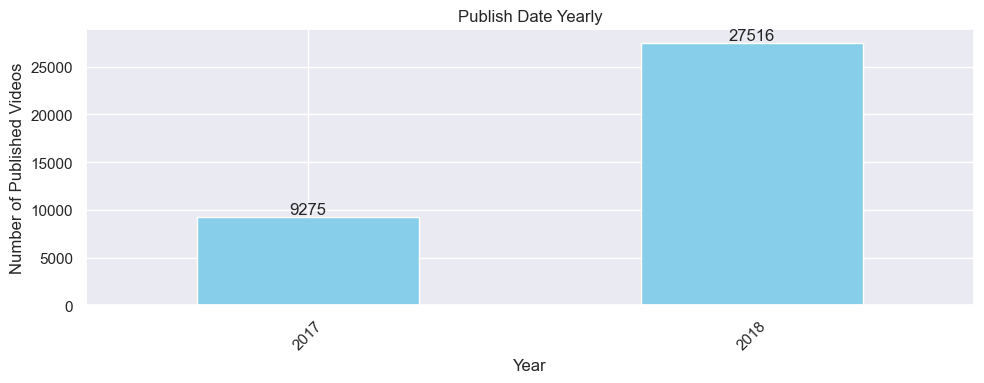

In [109]:
# Year
yearly_date = df_raw.groupby(df_raw['publish_date'].dt.year)['publish_date'].count()

yearly_date.plot(kind='bar', color='skyblue')
plt.title('Publish Date Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Published Videos')
plt.xticks(rotation=45)
for index, value in enumerate(yearly_date):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Note

ini tambahan dibagian EDA dan Feature engineering tapi urutannya bener atau ngga gatau

# Handling Missing Values

In [110]:
df_raw.isna().sum()/len(df_raw)*100

trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               0.122313
No_tags                   0.000000
desc_len                  0.000000
len_title                 0.000000
publish_date              0.000000
Trending_Day_of_month     0.000000
Trending_Day_name         0.000000
week_of_month             0.000000
Trending_Weekend_flag     0.000000
Trending_Month            0.000000
publish_time_hour         0.000000
publish_time_minute       0.000000
publish_time_second       0.000000
dtype: float64

In [111]:
df_raw['description'] = df_raw['description'].fillna(df_raw['description'].mode()[0])

In [112]:
df_raw.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
Trending_Day_of_month     0
Trending_Day_name         0
week_of_month             0
Trending_Weekend_flag     0
Trending_Month            0
publish_time_hour         0
publish_time_minute       0
publish_time_second       0
dtype: int64

# Handling Duplicates

In [113]:
df_raw.duplicated().sum()

4229

In [114]:
df_raw.drop_duplicates(inplace=True)

In [115]:
df_raw.duplicated().sum()

0

# Handling Outliers

In [116]:
from scipy import stats

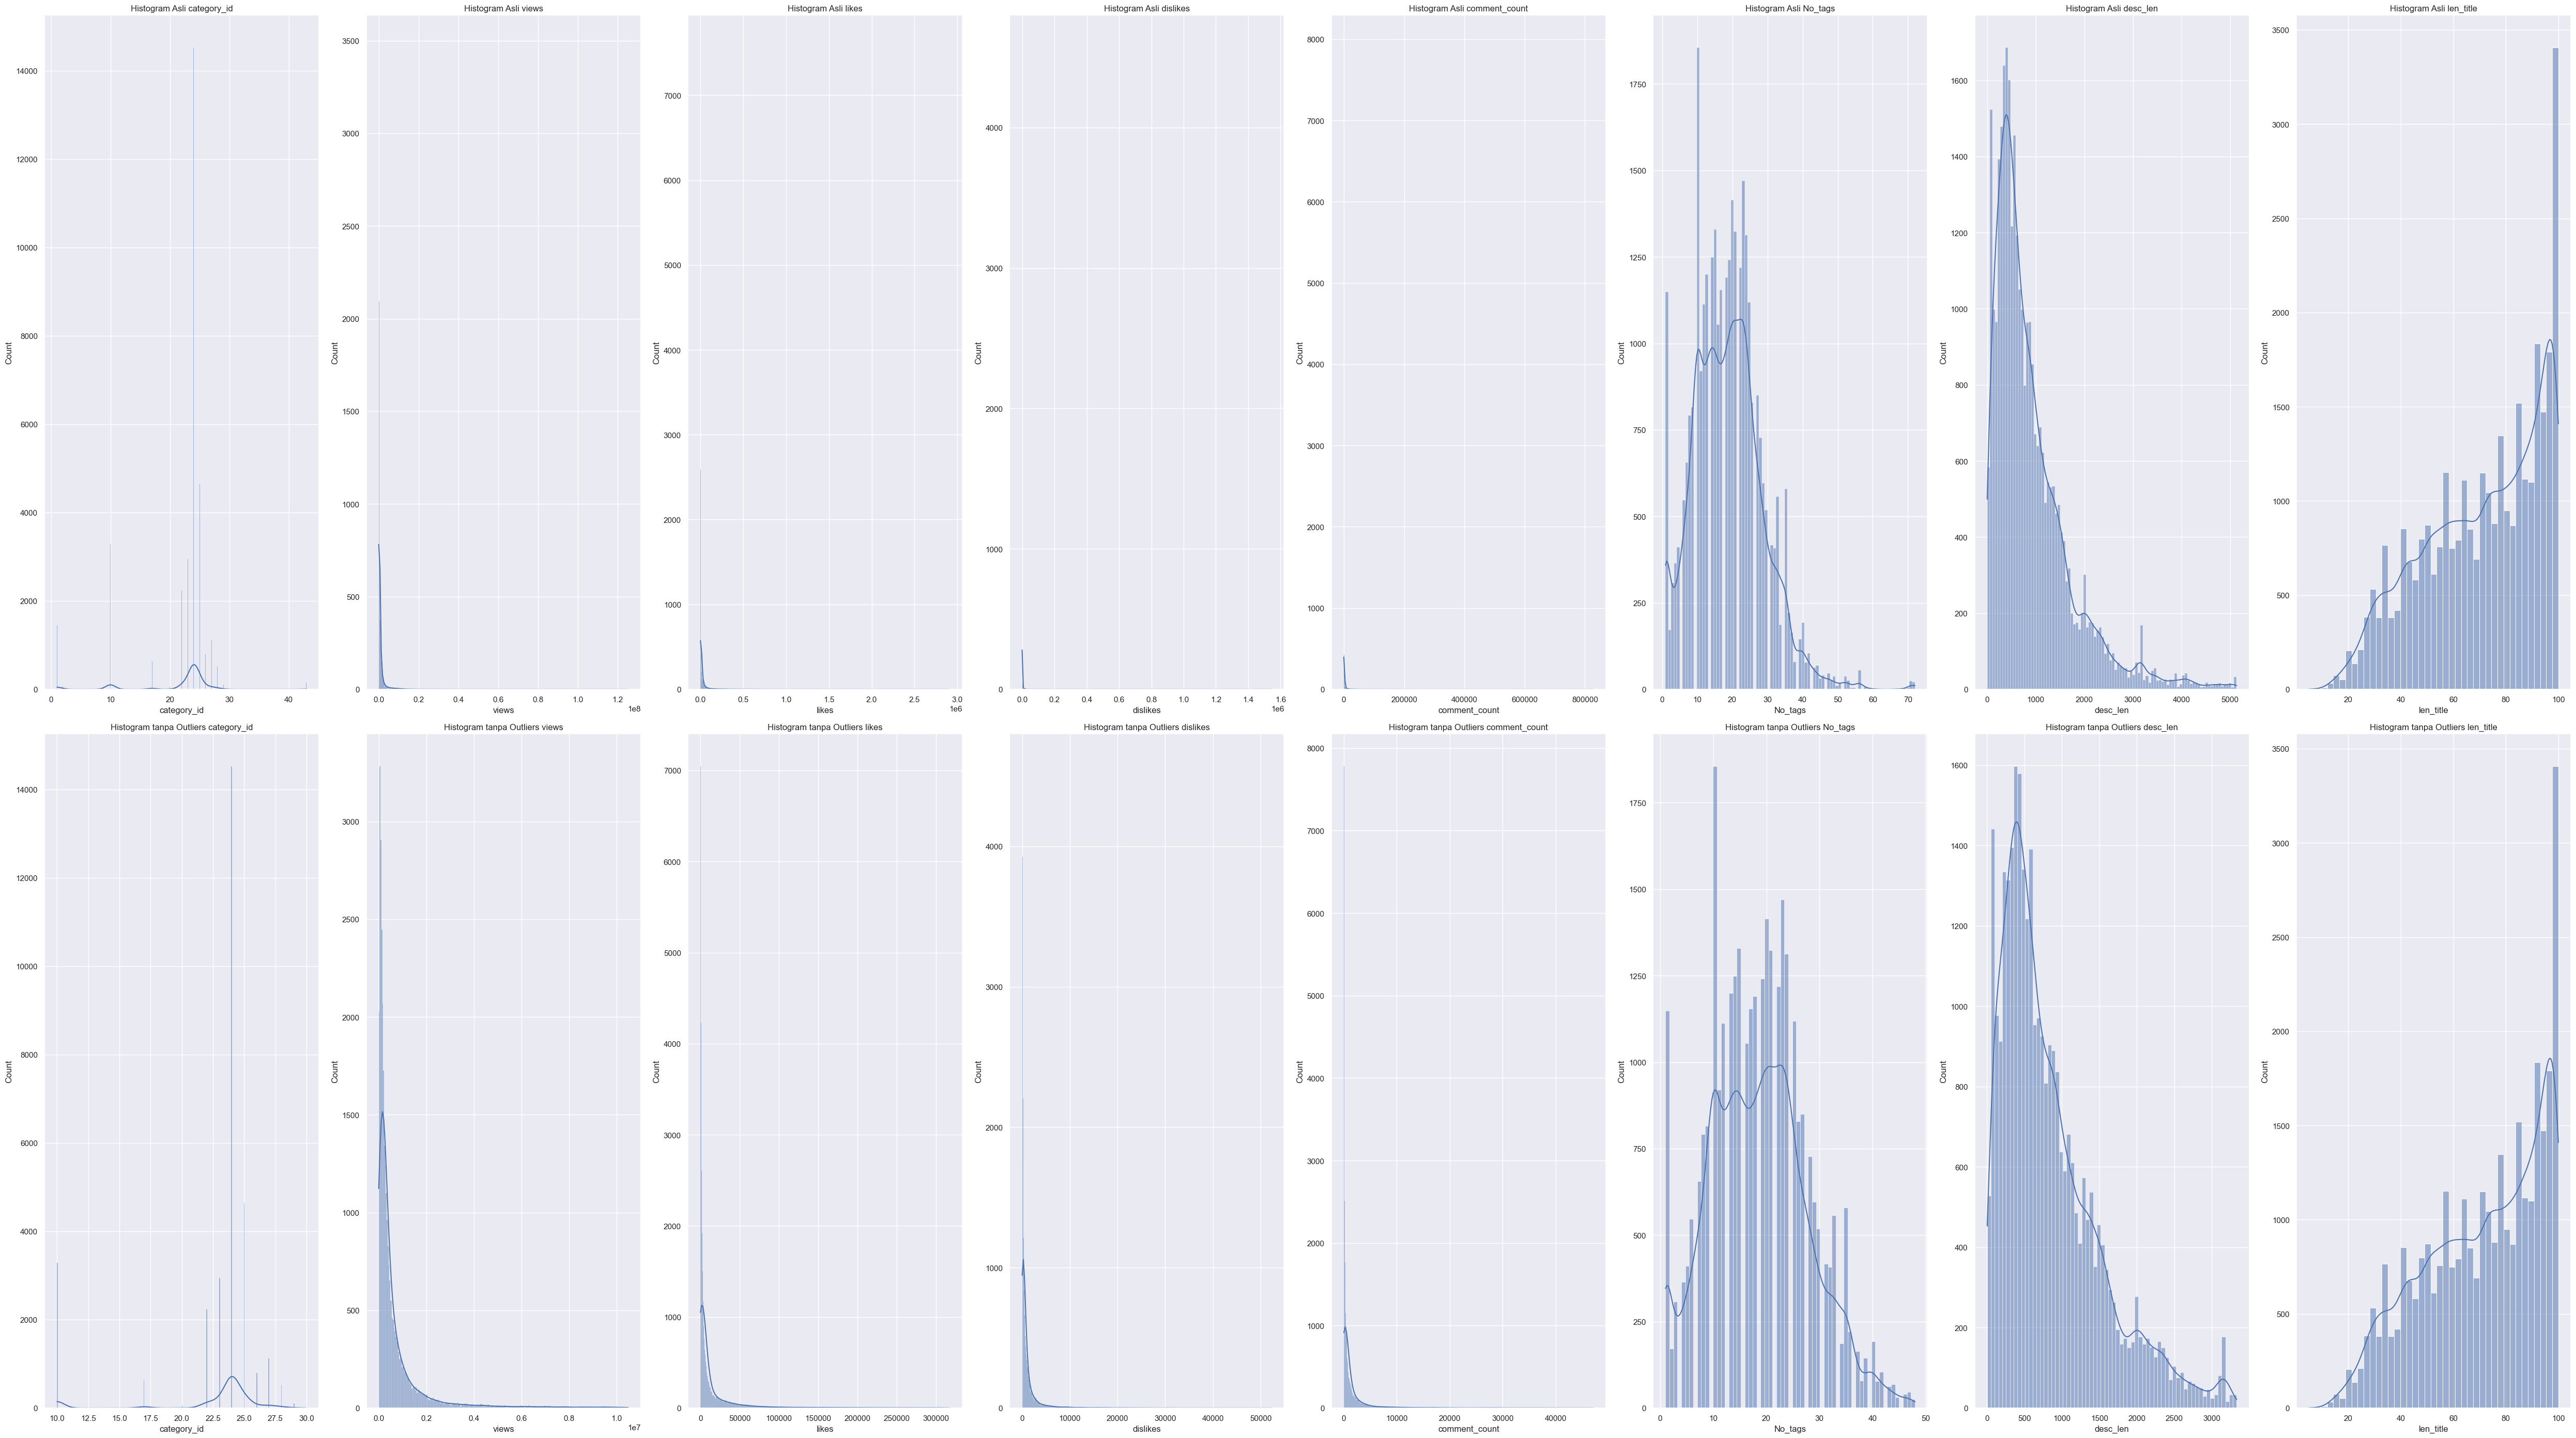

In [117]:
plt.figure(figsize=(50, 28))  # Tetapkan ukuran gambar secara keseluruhan

# Loop melalui setiap kolom numerik
for i in range(len(nums)):
    current_column = nums[i]


    plt.subplot(2, len(nums), i + 1)
    sns.histplot(df_raw[current_column], kde=True)
    plt.title(f'Histogram Asli {current_column}')
    plt.xlabel(current_column)

    # Hitung Z-score
    z_scores = np.abs((df_raw[current_column] - df_raw[current_column].mean()) / df_raw[current_column].std())
    
    threshold = 3

    # Identifikasi dan tangani outliers
    outliers = df_raw[z_scores > threshold]
    df_no_outliers = df_raw[z_scores <= threshold]

    # Gunakan Seaborn untuk menggambar histogram tanpa outliers
    plt.subplot(2, len(nums), i + 1 + len(nums))
    sns.histplot(df_no_outliers[current_column], kde=True)
    plt.title(f'Histogram tanpa Outliers {current_column}')
    plt.xlabel(current_column)
plt.tight_layout()
plt.show()

In [118]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_pre = df_raw.copy()
for var in nums:
    df_pre['log_'+var]= (df_raw[var]+1).apply(np.log)

In [119]:
for var in nums:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [120]:
df_raw.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,Trending_Day_of_month,week_of_month,Trending_Weekend_flag,Trending_Month,publish_time_hour,publish_time_minute,publish_time_second
count,32562.000000,3.256200e+04,3.256200e+04,3.256200e+04,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000
mean,21.602420,1.007091e+06,2.595444e+04,1.596781e+03,2561.672747,18.849057,913.270684,70.995670,15.973988,2.729071,0.299245,5.401818,10.627726,27.796696,24.582427
std,6.525405,3.171556e+06,9.720113e+04,1.703103e+04,14885.907004,9.863164,807.088596,22.280423,8.751024,1.264914,0.457934,4.058222,5.231050,16.878969,18.928867
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,1.141622e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,366.000000,54.000000,8.000000,2.000000,0.000000,2.000000,6.000000,14.000000,6.000000
50%,24.000000,2.777880e+05,2.817000e+03,2.930000e+02,306.000000,19.000000,673.000000,75.000000,16.000000,3.000000,0.000000,4.000000,11.000000,30.000000,23.000000
75%,24.000000,7.389245e+05,1.229900e+04,9.430000e+02,1188.000000,25.000000,1226.000000,91.000000,23.000000,4.000000,1.000000,11.000000,14.000000,40.000000,41.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,31.000000,5.000000,1.000000,12.000000,23.000000,59.000000,59.000000


In [121]:
df_pre.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2023-12-09 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,6.825460,4.406719,0.000000,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2023-12-09 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,7.711101,4.077537,0.571429,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2023-12-09 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,6.180017,4.077537,0.547619,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2023-12-09 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,5.575949,3.433987,0.523810,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2023-12-09 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,6.625392,4.488636,0.547619,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684


# Split Train & Test

<Axes: >

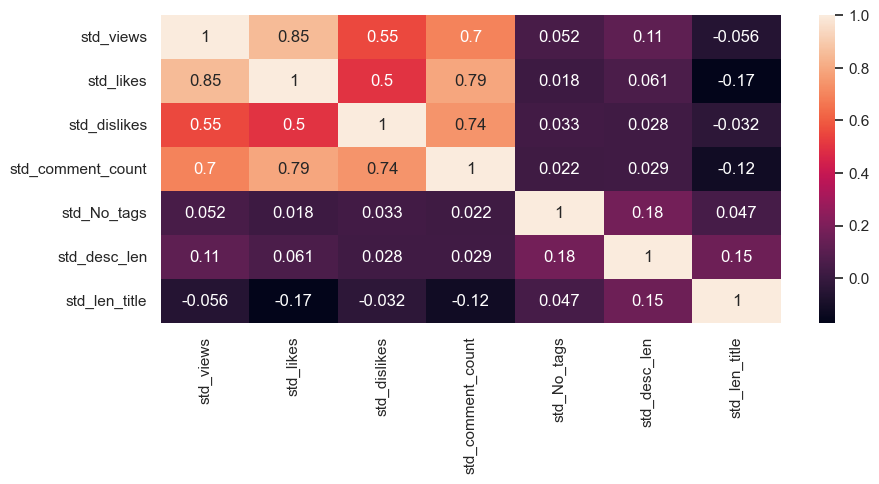

In [122]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']].corr(), annot=True)

In [123]:
X = df_pre[['std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] # menggunakan semua feature kecuali target
y = df_pre['std_views']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting 

## Fit Simple Linear Regression Model

In [125]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict

In [126]:
predict = regressor.predict(X_test)

In [127]:
np.exp(predict).round()

array([1., 1., 1., ..., 1., 1., 1.])

### Evaluation

In [128]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, predict, X_train, y_train, X_test, y_test):
    print("MAE: %.2f" % mean_absolute_error(y_test, predict)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_test, predict, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_test, predict))

In [129]:
predict = regressor.predict(X_test)

print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_) 

eval_regression(regressor, predict, X_train, y_train, X_test,y_test)

Coefficients: 
 [ 0.6576406   0.57842336 -0.2653906   0.00351783  0.00718946  0.00760923]
Intercept: 
 -0.005132680361597586
MAE: 0.01
RMSE: 0.01
R2 score: 0.77


# Fit Ridge Regularization Model

In [130]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [131]:
predict = ridge_model.predict(X_test)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, predict, X_train, y_train, X_test,y_test)

Coefficients: 
 [ 0.57177597  0.29161023 -0.00903025  0.00377528  0.00805966  0.00734198]
Intercept: 
 -0.004905169133171664
MAE: 0.01
RMSE: 0.01
R2 score: 0.77


### Randomized Search

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

In [133]:
predict = best_model.predict(X_test)
eval_regression(best_model, predict, X_train, y_train, X_test, y_test)

MAE: 0.01
RMSE: 0.02
R2 score: 0.19


# Fit Lasso Regularization Model

In [134]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [135]:
predict = lasso_model.predict(X_test)
eval_regression(lasso_model, predict, X_train, y_train, X_test, y_test)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


### Randomized Search

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

In [137]:
predict = best_model.predict(X_test)
eval_regression(best_model, predict, X_train, y_train, X_test, y_test)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


# Fit Elastic Net Regularization Model

In [138]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [139]:
predict = elasticnet_model.predict(X_test)
eval_regression(elasticnet_model, predict, X_train, y_train, X_test, y_test)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


### Randomized Search


In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio)

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

In [141]:
predict = best_model.predict(X_test)
eval_regression(best_model, predict, X_train, y_train, X_test, y_test)

MAE: 0.01
RMSE: 0.01
R2 score: 0.77


# Fit Decision Tree Model

In [142]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
eval_regression(dt, predict, X_train, y_train, X_test, y_test)

MAE: 0.00
RMSE: 0.01
R2 score: 0.90


# Fit Random Forest Model

In [148]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
best_model_1 = rf.fit(X_train, y_train)
predict = rf.predict(X_test)
eval_regression(rf, predict, X_train, y_train, X_test, y_test)

MAE: 0.00
RMSE: 0.01
R2 score: 0.96


Text(0.5, 1.0, 'feature importance score')

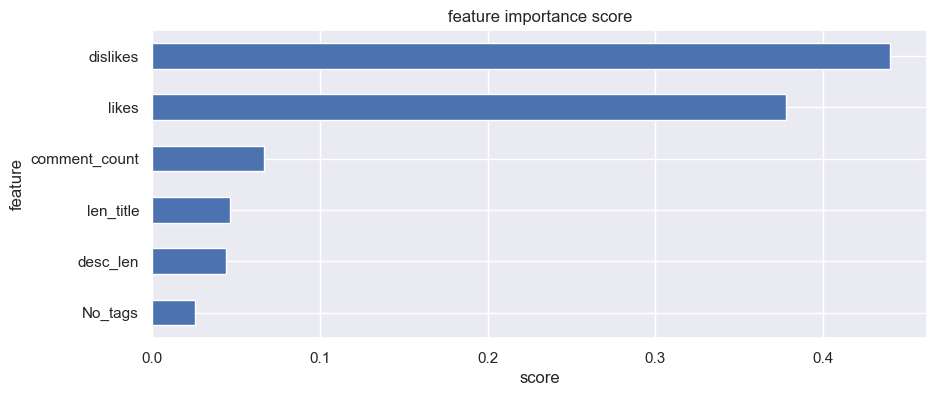

In [149]:
X=df[['likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Fit Support Vector Regressor Model

In [150]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
predict = svr.predict(X_test)
eval_regression(svr, predict, X_train, y_train, X_test, y_test)

MAE: 0.07
RMSE: 0.08
R2 score: -6.95


# Save Model

In [152]:
import pickle
pickle.dump(best_model_1, open('RandomForest_model.pkl', 'wb'))

In [153]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print('Model Score : ', str(round(result,2)*100), '%')

Model Score :  96.0 %


In [155]:
print('Train accuracy : ', str(round(loaded_model.score(X_train, y_train),2)*100), '%')
print('Test accuracy : ', str(round(loaded_model.score(X_test, y_test),2)*100), '%')

Train accuracy :  99.0 %
Test accuracy :  96.0 %
